In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
df['booking_status']

0        Not_Canceled
1        Not_Canceled
2            Canceled
3            Canceled
4            Canceled
             ...     
36270    Not_Canceled
36271        Canceled
36272    Not_Canceled
36273        Canceled
36274    Not_Canceled
Name: booking_status, Length: 36275, dtype: object

In [5]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
duplicated_rows=df[df.duplicated()]
print(f'No of Duplicated Rows Present in the dataset: {duplicated_rows.shape[0]}')

No of Duplicated Rows Present in the dataset: 0


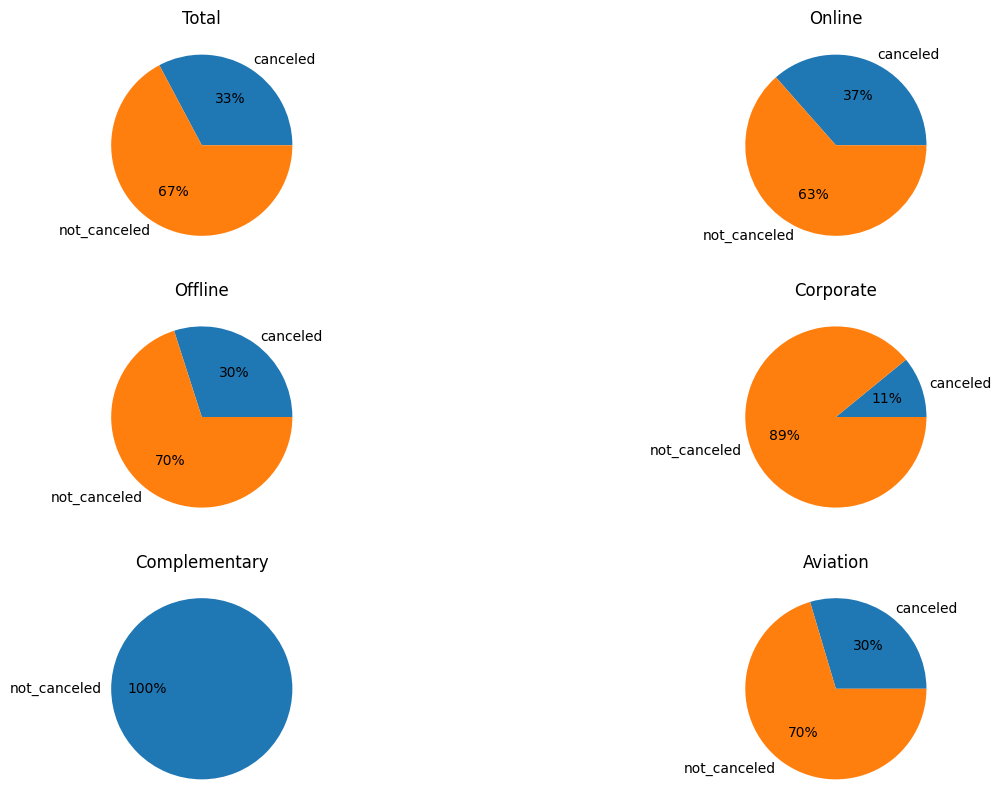

In [7]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)

ax1.set_title("Total")
ax2.set_title("Online")
ax3.set_title("Offline")
ax4.set_title("Corporate")
ax5.set_title("Complementary")
ax6.set_title("Aviation")

ax1.pie(df.groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled'])
ax2.pie(df[df['market_segment_type']=='Online'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled'])
ax3.pie(df[df['market_segment_type']=='Offline'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled'])
ax4.pie(df[df['market_segment_type']=='Corporate'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled'])
ax5.pie(df[df['market_segment_type']=='Complementary'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['not_canceled'])
ax6.pie(df[df['market_segment_type']=='Aviation'].groupby('booking_status')['Booking_ID'].count(),autopct='%.0f%%',labels=['canceled','not_canceled']);

In [8]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_feature)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [9]:
num_feature=['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space',
             'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 
             'avg_price_per_room', 'no_of_special_requests']
date_feature=['arrival_year', 'arrival_month', 'arrival_date']

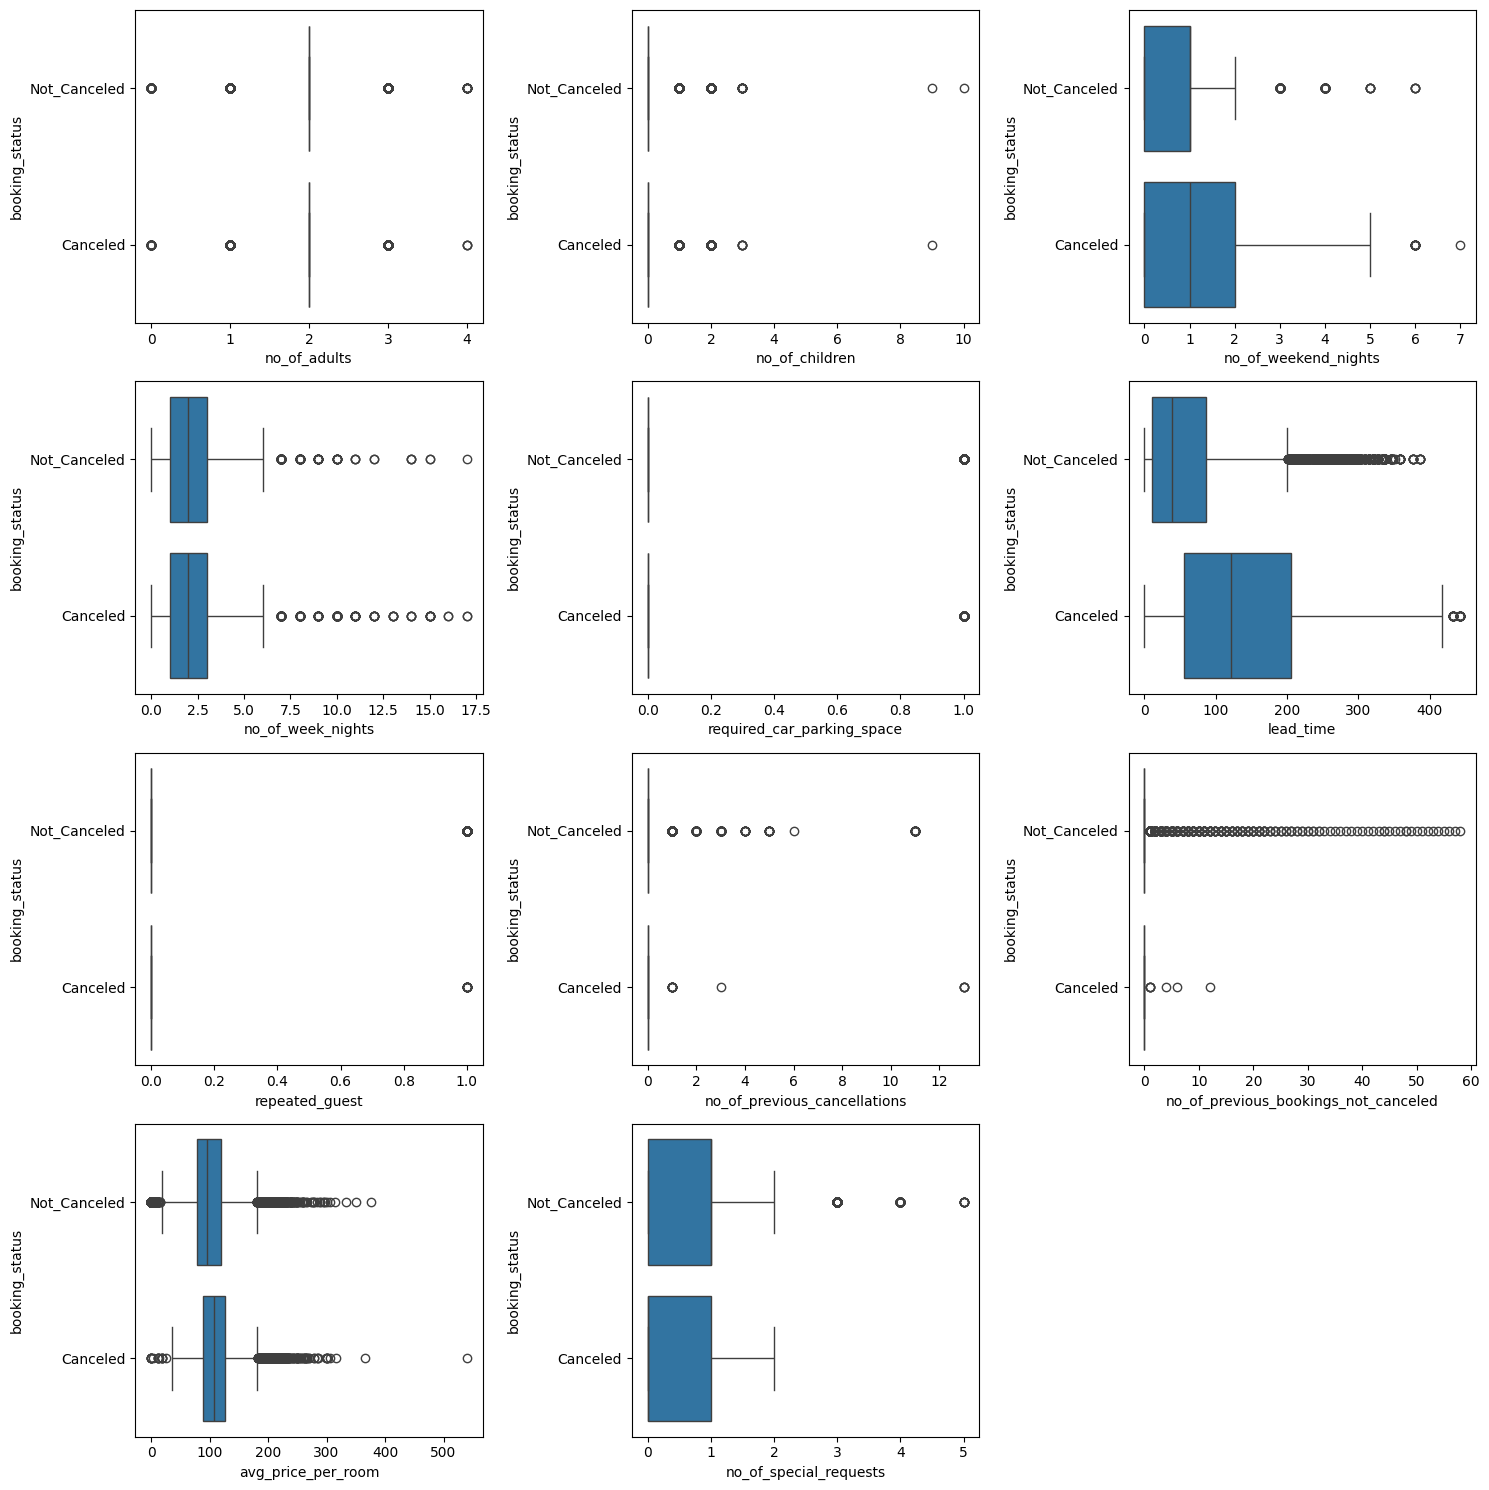

In [10]:
fig = plt.figure(figsize=(15,15))

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df,x=df[num_feature[i]],y=df['booking_status'])

plt.tight_layout()
plt.show()

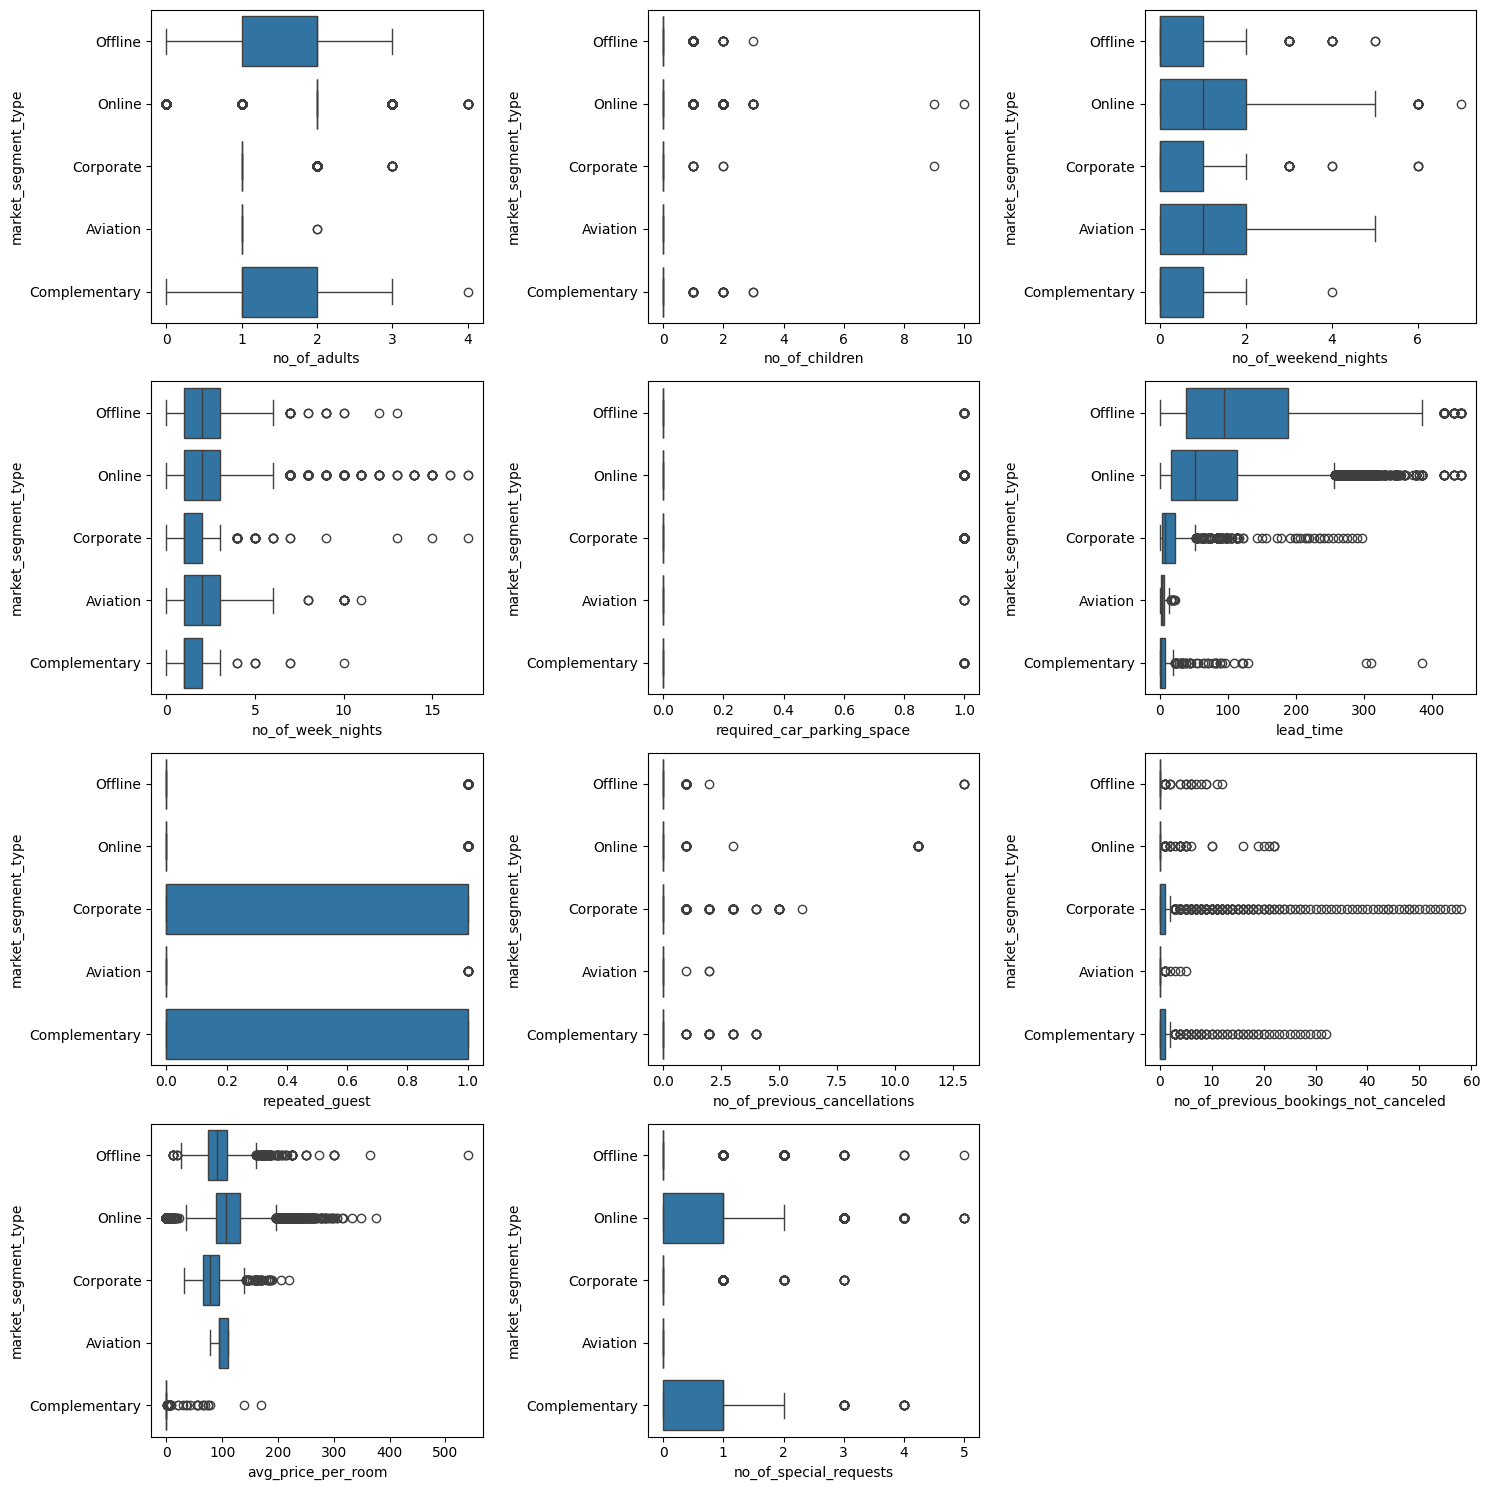

In [11]:
fig = plt.figure(figsize=(15,15))

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df,x=df[num_feature[i]],y=df['market_segment_type'])

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


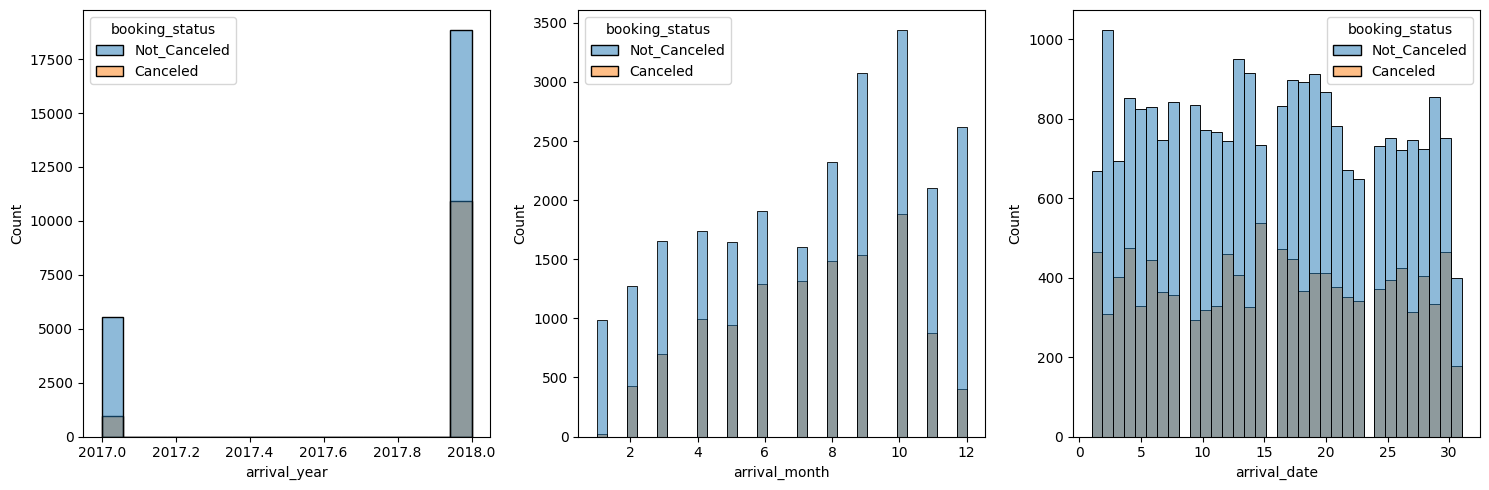

In [12]:
fig = plt.figure(figsize=(15,5))

for i in range(len(date_feature)):
    plt.subplot(1,3,i+1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
    sns.histplot(data=df,x=df[date_feature[i]],hue=df['booking_status'])


plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


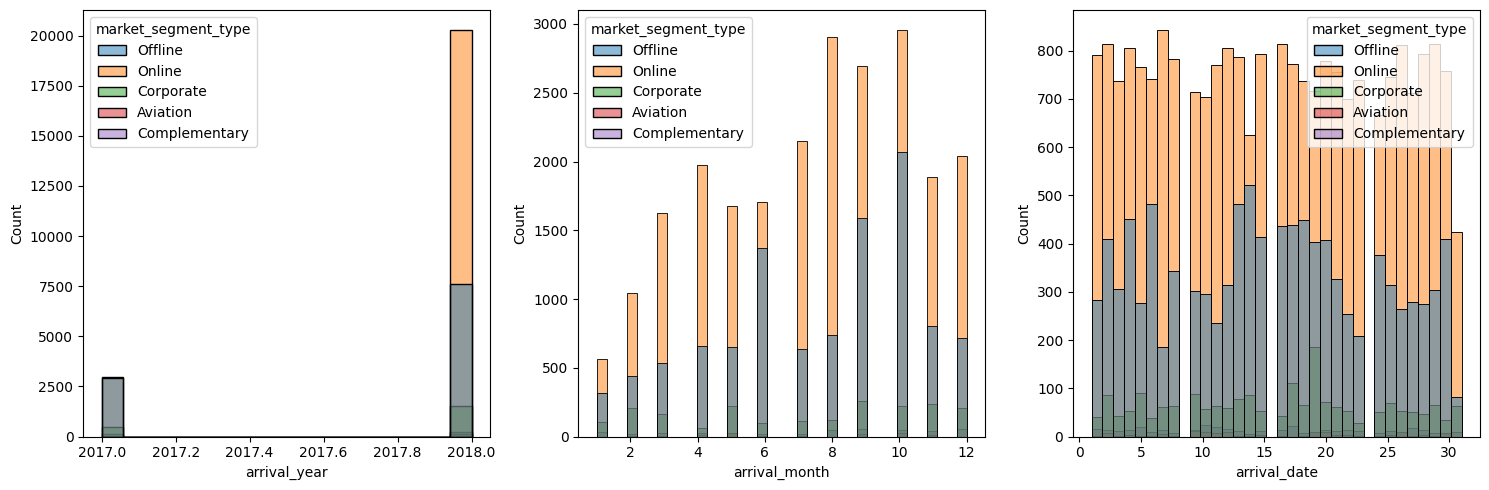

In [13]:
fig = plt.figure(figsize=(15,5))

for i in range(len(date_feature)):
    plt.subplot(1,3,i+1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
    sns.histplot(data=df,x=df[date_feature[i]],hue=df['market_segment_type'])


plt.tight_layout()
plt.show()

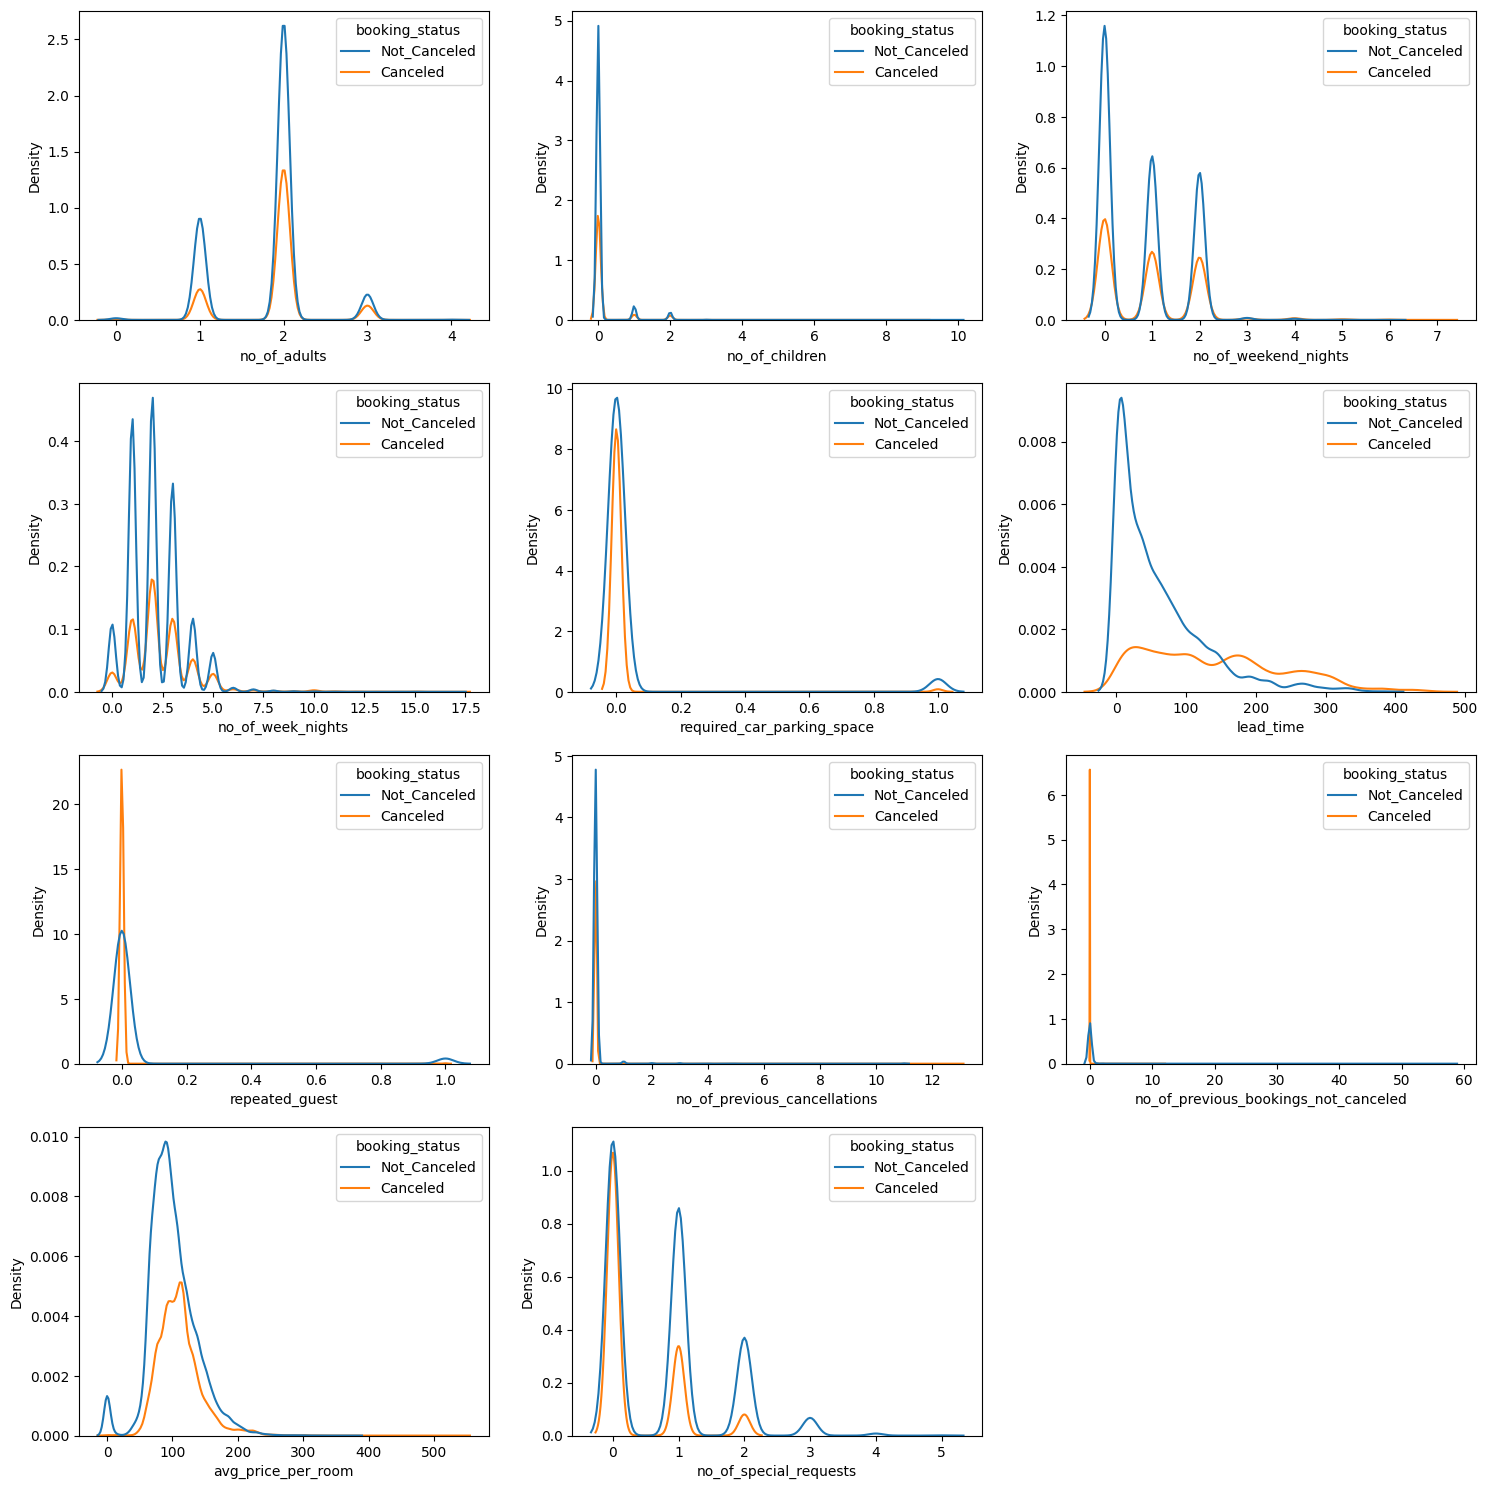

In [14]:
fig = plt.figure(figsize=(15,15))

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(data=df,x=df[num_feature[i]],hue=df['booking_status'])

plt.tight_layout()
plt.show()

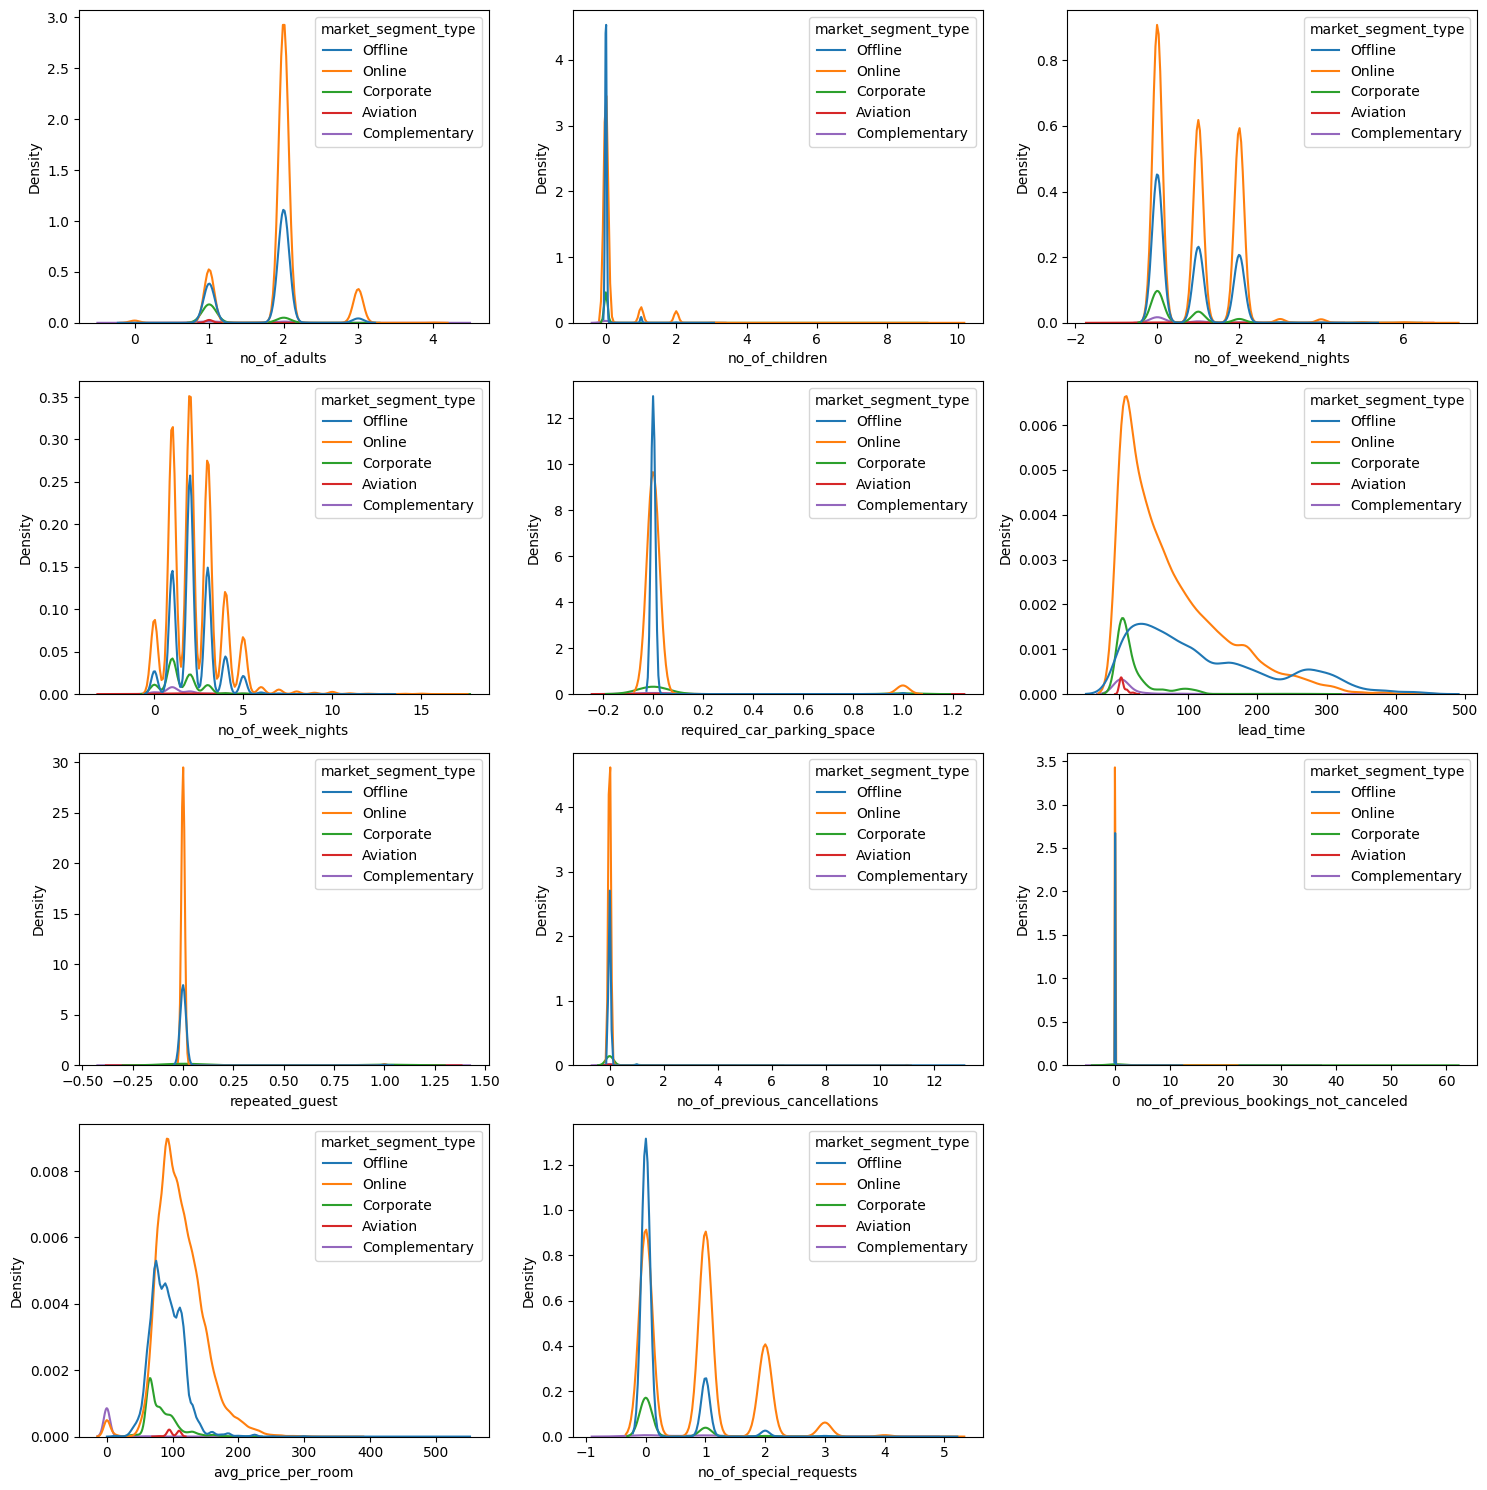

In [15]:
fig = plt.figure(figsize=(15,15))

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(data=df,x=df[num_feature[i]],hue=df['market_segment_type'])

plt.tight_layout()
plt.show()

In [16]:
df['booking_status'] = df['booking_status'].replace(['Canceled', 'Not_Canceled'],[1,0])

In [17]:
df['booking_status']

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64

In [18]:
df = pd.get_dummies(df, drop_first=True)

In [19]:
df['no_of_adults'] = np.log(df['no_of_adults'] + 1)
df['no_of_children'] = np.log(df['no_of_children'] + 1)
df['no_of_weekend_nights'] = np.log(df['no_of_weekend_nights'] + 1)
df['no_of_week_nights'] = np.log(df['no_of_week_nights'] + 1)
df['required_car_parking_space'] = np.log(df['required_car_parking_space'] + 1)
df['lead_time'] = np.log(df['lead_time'] + 1)
df['repeated_guest'] = np.log(df['repeated_guest'] + 1)
df['no_of_previous_cancellations'] = np.log(df['no_of_previous_cancellations'] + 1)
df['no_of_previous_bookings_not_canceled'] = np.log(df['no_of_previous_bookings_not_canceled'] + 1)
df['avg_price_per_room'] = np.log(df['avg_price_per_room'] + 1)
df['no_of_special_requests'] = np.log(df['no_of_special_requests'] + 1)

In [20]:
y = df["booking_status"]
X = df.drop("booking_status", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7757052283377746
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      7332
           1       0.70      0.56      0.62      3551

    accuracy                           0.78     10883
   macro avg       0.75      0.72      0.73     10883
weighted avg       0.77      0.78      0.77     10883



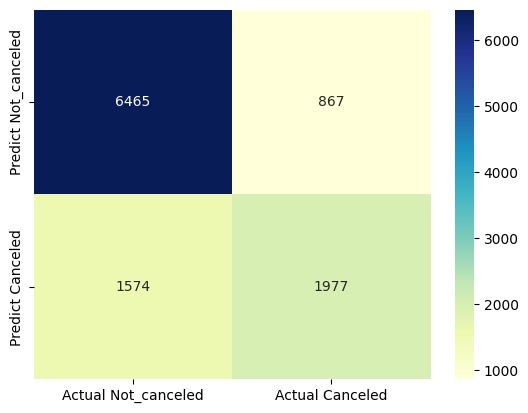

In [22]:
cm_matrix = pd.DataFrame(data=conf, columns=['Actual Not_canceled', 'Actual Canceled'], 
                                 index=['Predict Not_canceled', 'Predict Canceled'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu');